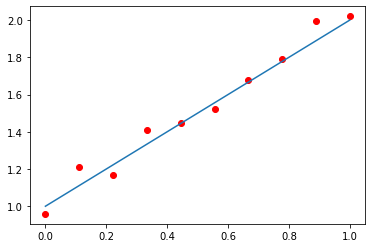

In [15]:
# Simple regression example


import numpy as np
import matplotlib.pyplot as plt 

beta0true = 1
beta1true = 1

beta = np.asarray([beta0true, beta1true])

x = np.linspace(0,1,10)


# feature matrix 
# hstack : stack numpy arrays horizontally
# vstack : stack vertically


Xtilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1,1)))


# Xtilde = [1, x] = [1, x^(1); 1 x^(2); ... ]

t = np.matmul(Xtilde, np.asarray(beta))

tnoisy = t+np.random.normal(0,.1, len(t))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

In [31]:
print(beta)

[[ 1.81090843]
 [-1.48249031]]


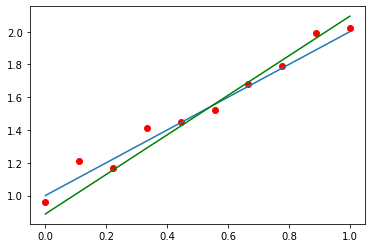

In [35]:
# RSS = (Xtilde*beta - t)^T (Xtilde*beta - t)

beta0 = np.random.normal(0,1,1)
beta1 = np.random.normal(0,1,1)

beta = np.squeeze(beta)


maxIter = 1000
eta = .01


# grad_beta0 =  (2/N) * sum_i (t_i - (beta0 + beta1 * x_1^i )) (-1)
# grad_beta1 =  (2/N) * sum_i (t_i - (beta0 + beta1 * x_1^i )) (-x_1^i)


N = len(x) # number of training samples

RSS = np.zeros((maxIter, ))

for i in np.arange(maxIter): 
    
    grad_beta0 = (2/N) * np.sum((t - np.matmul(Xtilde,beta)))*(-1)
    
    grad_beta1 = (2/N) * np.sum(np.multiply((t - np.matmul(Xtilde,beta)).reshape(-1,1), -x.reshape(-1,1)))
    
    beta0 -= eta*grad_beta0
    beta1 -= eta*grad_beta1
    
    beta = np.squeeze(np.asarray([beta0, beta1]))
    
    
    RSS[i] = (1/N)*np.sum((t - np.matmul(Xtilde,beta))**2)
    
    
     
beta_learned = beta
    
xtest = np.linspace(0,1,100)

Xtilde_test = np.hstack((np.ones((len(xtest), 1)), xtest.reshape(-1,1)))

prediction = np.matmul(Xtilde_test, beta_learned.reshape(-1,1))


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(xtest, prediction, c='g')
plt.show()


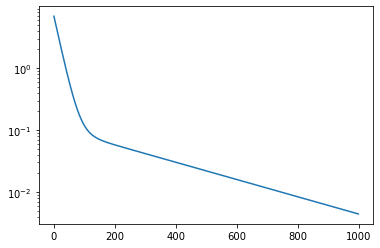

In [37]:
plt.semilogy(RSS)
plt.show()

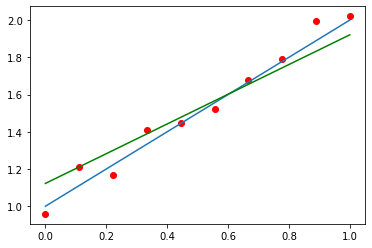

In [47]:
# RSS = (Xtilde*beta - t)^T (Xtilde*beta - t)

beta0 = np.random.normal(0,1,1)
beta1 = np.random.normal(0,1,1)

beta = np.squeeze(beta)


eta = .05


# grad_beta0 =  (2/N) * sum_i (t_i - (beta0 + beta1 * x_1^i )) (-1)
# grad_beta1 =  (2/N) * sum_i (t_i - (beta0 + beta1 * x_1^i )) (-x_1^i)


N = len(x) # number of training samples


num_epochs = 40

RSS = np.zeros((len(x)*num_epochs, ))

for epoch in np.arange(num_epochs):

    for i in np.arange(len(x)):

        
        xtilde_i = np.squeeze(np.asarray([1, x[i]]))
        grad_beta0 = (t[i] - np.matmul(xtilde_i,beta))*(-1)
        grad_beta1 = (t[i] - np.matmul(xtilde_i,beta))*(-x[i])

        beta0 -= eta*grad_beta0
        beta1 -= eta*grad_beta1

        beta = np.squeeze(np.asarray([beta0, beta1]))

        RSS[epoch*len(x) +i] = (1/N)*np.sum((t - np.matmul(Xtilde,beta))**2)
    
    
     
beta_learned = beta
    
xtest = np.linspace(0,1,100)

Xtilde_test = np.hstack((np.ones((len(xtest), 1)), xtest.reshape(-1,1)))

prediction = np.matmul(Xtilde_test, beta_learned.reshape(-1,1))


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(xtest, prediction, c='g')
plt.show()
   

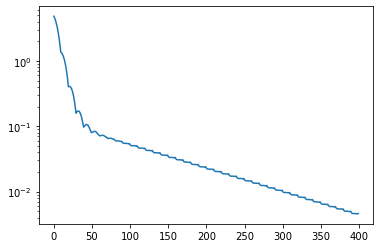

In [49]:
plt.semilogy(RSS)
plt.show()